In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
img = plt.imread('../../Wira - Github/18 - Unsupervised Learning/01 - Clustering/assets/komodo.jpg')
img.shape

(240, 320, 3)

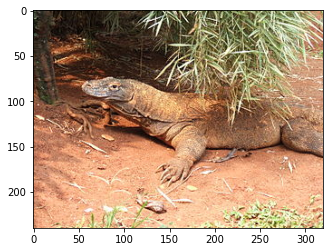

In [6]:
plt.imshow(img)
plt.show()

# Buat Tiap Pixel jadi Data

In [7]:
img = img.reshape(-1, 3)
img

array([[ 50,  62,  42],
       [ 98, 107,  88],
       [101, 105,  90],
       ...,
       [252, 255, 204],
       [209, 212, 167],
       [147, 145, 107]], dtype=uint8)

Mengambil semua pixel dengan 3 channel (R, G, B)

In [10]:
len(img) # total pixel

76800

In [11]:
len(np.unique(img, axis=0)) # total unique color

48548

Terdapat 48548 warna yang berbeda tiap pixel

# Cluster 62643 colors into 8 color pallete

In [13]:
kmeans = KMeans(n_clusters=8, random_state=42)
member = kmeans.fit_predict(img)
member

array([0, 2, 2, ..., 6, 4, 5])

In [16]:
[ 50,  62,  42]

[50, 62, 42]

In [15]:
kmeans.cluster_centers_

array([[ 88.73803443,  62.66029983,  39.18567463],
       [222.76249534, 159.46074226, 120.55669526],
       [133.23740633,  97.5679642 ,  66.14009159],
       [ 45.60496636,  29.74297586,  17.33072814],
       [245.27748261, 192.62156863, 151.65768501],
       [175.31428312, 128.46292931,  93.48010176],
       [244.30172414, 234.02824652, 195.75953778],
       [182.47690191, 173.96658148, 133.03518773]])

In [14]:
palette = kmeans.cluster_centers_.astype(int)
palette

array([[ 88,  62,  39],
       [222, 159, 120],
       [133,  97,  66],
       [ 45,  29,  17],
       [245, 192, 151],
       [175, 128,  93],
       [244, 234, 195],
       [182, 173, 133]])

Warna yang baru

In [17]:
quantized_img = palette[member].reshape(240, 320, 3)
quantized_img

array([[[ 88,  62,  39],
        [133,  97,  66],
        [133,  97,  66],
        ...,
        [175, 128,  93],
        [245, 192, 151],
        [182, 173, 133]],

       [[133,  97,  66],
        [133,  97,  66],
        [133,  97,  66],
        ...,
        [175, 128,  93],
        [175, 128,  93],
        [244, 234, 195]],

       [[133,  97,  66],
        [ 45,  29,  17],
        [ 45,  29,  17],
        ...,
        [175, 128,  93],
        [133,  97,  66],
        [182, 173, 133]],

       ...,

       [[175, 128,  93],
        [175, 128,  93],
        [133,  97,  66],
        ...,
        [244, 234, 195],
        [244, 234, 195],
        [244, 234, 195]],

       [[175, 128,  93],
        [222, 159, 120],
        [175, 128,  93],
        ...,
        [244, 234, 195],
        [244, 234, 195],
        [175, 128,  93]],

       [[222, 159, 120],
        [222, 159, 120],
        [175, 128,  93],
        ...,
        [244, 234, 195],
        [245, 192, 151],
        [175, 128,  93]]

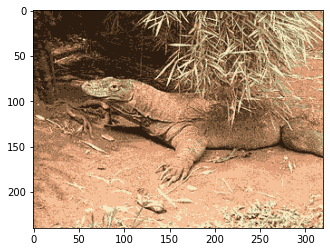

In [19]:
plt.imshow(quantized_img)
plt.show()

# Kode Lengkap

In [21]:
def quantize(img, n_palette):
    n_unique = len(np.unique(img.reshape(-1, 3), axis=0))

    kmeans = KMeans(n_clusters=n_palette, random_state=42)
    member = kmeans.fit_predict(img.reshape(-1, 3))
    palette = kmeans.cluster_centers_.astype(int)
    quantized_img = palette[member].reshape(*img.shape)

    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img)
    plt.title(f"Original Image [{n_unique} colors]")
    plt.xticks([]); plt.yticks([])

    plt.subplot(122)
    plt.imshow(quantized_img)
    plt.title(f"Quantized Image [{n_palette} colors]")
    plt.xticks([]); plt.yticks([])

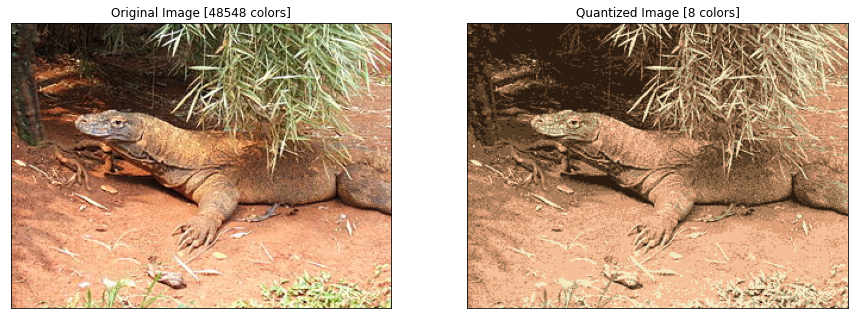

In [22]:
img = plt.imread('../../Wira - Github/18 - Unsupervised Learning/01 - Clustering/assets/komodo.jpg')
quantize(img, 8)

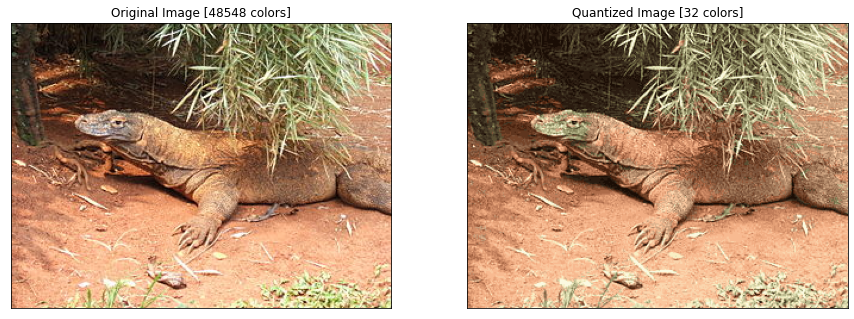

In [23]:
img = plt.imread('../../Wira - Github/18 - Unsupervised Learning/01 - Clustering/assets/komodo.jpg')
quantize(img, 32)

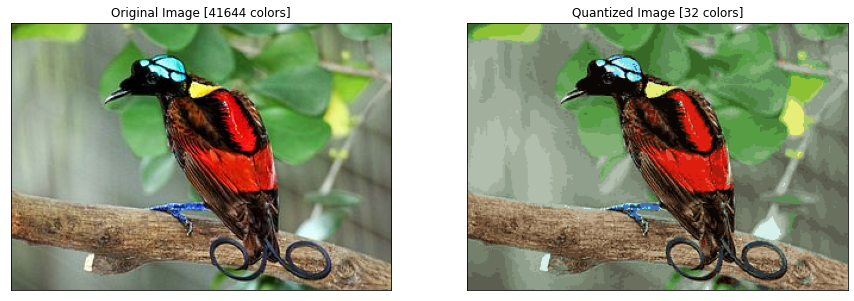

In [24]:
img = plt.imread('../../Wira - Github/18 - Unsupervised Learning/01 - Clustering/assets/cendrawasih_botak.jpg')
quantize(img, 32)

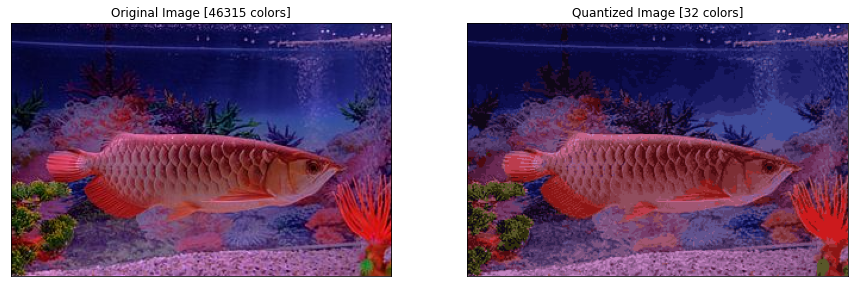

In [25]:
img = plt.imread('../../Wira - Github/18 - Unsupervised Learning/01 - Clustering/assets/arwana_merah.jpg')
quantize(img, 32)

# Kesimpulan
Note : idea ini dapat digunakan untuk hal lainnya seperti <b>Market Segmentation</b><br>
Untuk lebih lanjut, kita akan masuk ke dimensionalitu reduction, bidang unsupervised learning yang banyak manfaatnya
<br><br>
Here is the Example for Customer Segmentation<br>
https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis

# Compression Math (Opsional)

Original Image
- 100x100x3 RGB
- (100 * 100) * (3 * 8bit) = 240.000 bit

Compressed Image (32 Palette)
- 100x100 label + 32x3 RBG
- (100 * 100 * 4bit) + (32 * 3 * 8bit) = 40.768 bit